In [2]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_full = pd.read_csv('../input/heart.csv')
print("imports complete")

imports complete


In [3]:
#target: 1 = has heart disease, 0 = does not have heart disease
df_full.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


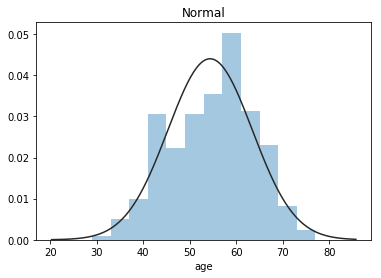

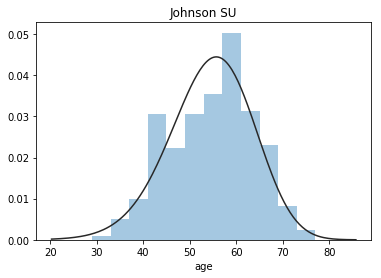

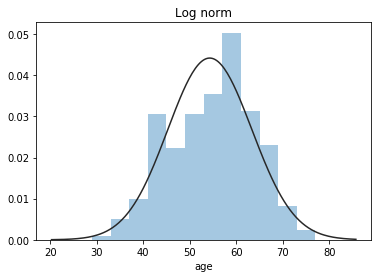

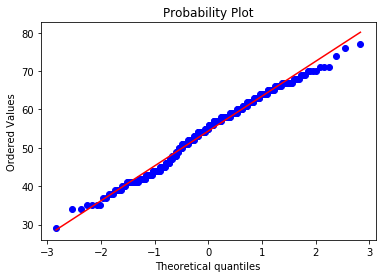

In [4]:
#The age of the participants is not quite normally distributed
y = df_full['age']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)

plt.figure(2); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)

plt.figure(3); plt.title('Log norm')
sns.distplot(y, kde=False, fit=stats.lognorm)

fig = plt.figure()
res = stats.probplot(df_full['age'], plot=plt)
plt.show()

In [ ]:
#The resting bps is not quite normally distirbuted (gaps before and after 120 and 140ish)
y = df_full['trestbps']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)

plt.figure(2); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)

plt.figure(3); plt.title('Log norm')
sns.distplot(y, kde=False, fit=stats.lognorm)

fig = plt.figure()
res = stats.probplot(df_full['trestbps'], plot=plt)
plt.show()

In [ ]:
df_full["trestbps"] = np.log1p(df_full["trestbps"])
fig = plt.figure()
res = stats.probplot(df_full['trestbps'], plot=plt)
plt.show()

Hypothesis:

H0 (null hypothesis): resting heart rate does not increases with age

H1 (alternative hypothesis): resting heart rate increases with age

test at a 5% significant level (0.05)

since we're only looking for an 'increase', this is a one tailed test

In [5]:
#One-sample location test 
#on whether the mean of a population is equal to a value specified in null hypothesis
t, p = stats.ttest_1samp(df_full['trestbps'], df_full['trestbps'][270:])
print("t = ", t, ", p = ", p)

t =  270    11.536775
271    -2.358455
272    11.536775
273    31.387104
274    21.461940
275     6.574193
276   -14.268652
277     7.566710
278    -4.343488
279    -6.328521
280    -4.343488
281     3.596644
282     5.581677
283   -20.223751
284    -8.313554
285    -8.313554
286    -2.358455
287   -22.208784
288    21.461940
289     3.596644
290   -16.253685
291    17.491874
292   -38.089047
293   -20.223751
294    11.536775
295    -8.313554
296     7.566710
297   -32.133948
298    -8.313554
299    21.461940
300   -12.283619
301     1.611611
302     1.611611
Name: trestbps, dtype: float64 , p =  [9.33519261e-026 1.89881977e-002 9.33519261e-026 4.42825563e-097
 1.05458758e-062 2.14719596e-010 1.15852171e-035 4.65952128e-013
 1.91708766e-005 8.92540174e-010 1.91708766e-005 3.76453640e-004
 5.30483703e-008 4.25922714e-058 3.20437835e-015 3.20437835e-015
 1.89881977e-002 1.86665475e-065 1.05458758e-062 3.76453640e-004
 4.07508044e-043 8.40608266e-048 2.40281956e-117 4.25922714e-058
 9.335

P-values represent the odds that this outcome was by random chance, or an outcome that is equal in chance or rarer.

In [8]:
#Independent (unpaird) two-sample location test 
#with a null hypothesis that the means of the two samples are equal
#t, p = stats.ttest_ind()

In [ ]:
plt.scatter(df_full['age'],df_full['trestbps'])
plt.xlabel('age')
plt.ylabel('resting bps')
plt.show()

In [ ]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['trestbps'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    print(spr)
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

spearman(df_full,df_full.columns)